In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD

In [3]:
x = np.linspace(1,100,102)
x

array([  1.        ,   1.98019802,   2.96039604,   3.94059406,
         4.92079208,   5.9009901 ,   6.88118812,   7.86138614,
         8.84158416,   9.82178218,  10.8019802 ,  11.78217822,
        12.76237624,  13.74257426,  14.72277228,  15.7029703 ,
        16.68316832,  17.66336634,  18.64356436,  19.62376238,
        20.6039604 ,  21.58415842,  22.56435644,  23.54455446,
        24.52475248,  25.5049505 ,  26.48514851,  27.46534653,
        28.44554455,  29.42574257,  30.40594059,  31.38613861,
        32.36633663,  33.34653465,  34.32673267,  35.30693069,
        36.28712871,  37.26732673,  38.24752475,  39.22772277,
        40.20792079,  41.18811881,  42.16831683,  43.14851485,
        44.12871287,  45.10891089,  46.08910891,  47.06930693,
        48.04950495,  49.02970297,  50.00990099,  50.99009901,
        51.97029703,  52.95049505,  53.93069307,  54.91089109,
        55.89108911,  56.87128713,  57.85148515,  58.83168317,
        59.81188119,  60.79207921,  61.77227723,  62.75

In [4]:
x = np.linspace(1,100,101)/100
y = 2 * x

In [5]:
model = Sequential()
model.add(Dense(101, input_dim = 1, activation = "linear"))
model.add(Dense(50, activation = "linear"))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 101)               202       
                                                                 
 dense_1 (Dense)             (None, 50)                5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5353 (20.91 KB)
Trainable params: 5353 (20.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from keras.optimizers import SGD

learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])


In [7]:
training = model.fit(x, y, epochs = 10)

Epoch 1/10
4/4 [==============================] - 0s 8ms/step - loss: 1.1993 - accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1928 - accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.0000e+00
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.0000e+00
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.0000e+00
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.0000e+00

In [8]:
training.history

{'loss': [1.1992814540863037,
  0.5375083088874817,
  0.29969242215156555,
  0.19276617467403412,
  0.15468478202819824,
  0.1297651082277298,
  0.1196105107665062,
  0.11181557178497314,
  0.1052771732211113,
  0.09837054461240768],
 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

dict_keys(['loss', 'accuracy'])


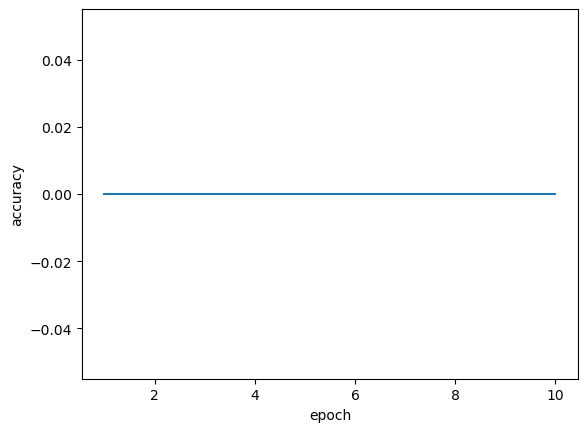

In [9]:
print(training.history.keys())
tx = [i  for i in range(1,11)]
ty = training.history['accuracy']
plt.plot(tx,ty)
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.show()

dict_keys(['loss', 'accuracy'])


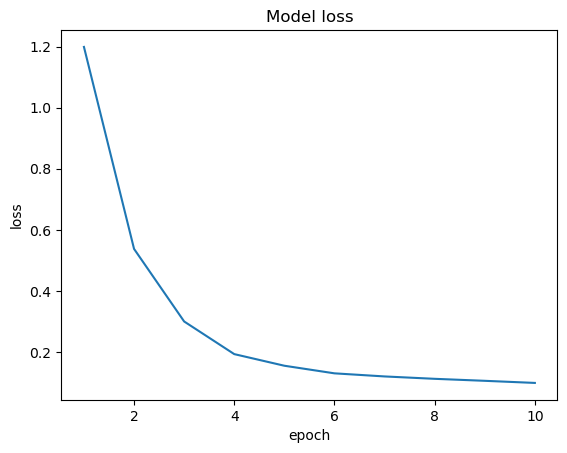

In [10]:
print(training.history.keys())
tx = [i  for i in range(1,11)]
ty = training.history['loss']
plt.plot(tx,ty)
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.show()

In [11]:
test_x = np.array([1000, 100, 1200, 1900])/1900
test_y = 2 * test_x
test = model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 137ms/step - loss: 0.1242 - accuracy: 0.0000e+00


In [12]:
test = np.array([100, 1000])
model.predict(test)

1/1 [==============================] - 0s 113ms/step


array([[ 96.41239],
       [958.8242 ]], dtype=float32)

In [13]:
model_json = model.to_json()
with open('day1.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('day1.h5')